In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = 7



path_figures=Path().cwd().parent.parent/"figures"
path_figures.mkdir(parents=True, exist_ok=True)
path_benchmark_data=Path.cwd().parent.parent/"benchmark_for_test"
path_benchmark_data.mkdir(parents=True, exist_ok=True)

In [48]:
step="update"

library_size=1_000_000
add_size=1_000_000
ion_mode=[-1,1]
extend_fold=[1.5, 2, 3]


In [49]:

df=[]
for charge in ion_mode:
    for fold in extend_fold:
        data={"library_number":library_size,"add_size":add_size, "step":step, "extend_fold":fold, "charge":charge}
        
        path_benchmark_specific_data_dynamic=path_benchmark_data/f"dynamic_fast_update_{charge}_{add_size}_added_to_{library_size}_compare_time_{step}_step_options_{fold}_fold.txt"
            
            
        with open(path_benchmark_specific_data_dynamic,"r") as f:
            dynamic=float(f.readline().strip())
            
        data["dynamic_entropy_search(fast_update)"]=dynamic

        df.append(pd.DataFrame([data]))
        
df=pd.concat(df)
df

,library_number,add_size,step,extend_fold,charge,dynamic_entropy_search(fast_update)
0,1000000,1000000,update,1.5,-1,30.523362
0,1000000,1000000,update,2.0,-1,31.498345
0,1000000,1000000,update,3.0,-1,30.074660
0,1000000,1000000,update,1.5,1,48.688834
0,1000000,1000000,update,2.0,1,50.379520
0,1000000,1000000,update,3.0,1,47.869907


In [50]:

df_data = df[["extend_fold", 
              "charge",
            "dynamic_entropy_search(fast_update)", 
            ]]
        
df_melted=df_data.melt(id_vars=["charge", "extend_fold"], var_name="type", value_name="time")
        
df_melted


,charge,extend_fold,type,time
0,-1,1.5,dynamic_entropy_search(fast_update),30.523362
1,-1,2.0,dynamic_entropy_search(fast_update),31.498345
2,-1,3.0,dynamic_entropy_search(fast_update),30.074660
3,1,1.5,dynamic_entropy_search(fast_update),48.688834
4,1,2.0,dynamic_entropy_search(fast_update),50.379520
5,1,3.0,dynamic_entropy_search(fast_update),47.869907


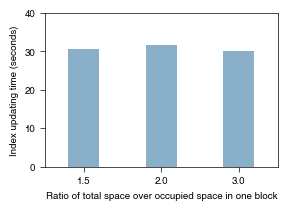

In [ ]:
charge=-1
df_charge=df_melted[df_melted["charge"]==charge]

# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update)": color_palette_set2[4],
    
}
plt.figure(figsize=(3, 2))

ax = plt.gca()

for spine in ax.spines.values():
    spine.set_linewidth(0.4)  

ax.tick_params(axis='both', 
               which='both',
               width=0.4,
               )

sns.barplot(x="extend_fold", y="time", hue="type", data=df_charge, 
                palette=color_palette, legend=False, width=0.4)
    

# Set y-axis title
plt.ylim(top=40)
plt.ylabel(f"Index updating time (seconds)")
        
if charge==-1:
    mode="-"
elif charge==1:
    mode='+'
plt.xlabel(f"Ratio of total space over occupied space in one block")


# Save figure
plt.savefig(path_figures / f"compare_time_different_fold_{step}_step_charge_{charge}_options_extend_fold.svg", bbox_inches="tight", dpi=1200)

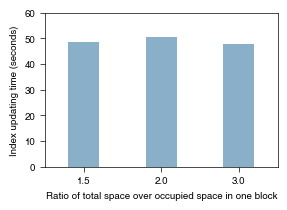

In [52]:
charge=1
df_charge=df_melted[df_melted["charge"]==charge]

# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update)": color_palette_set2[4],
    
}
plt.figure(figsize=(3, 2))

ax = plt.gca()

for spine in ax.spines.values():
    spine.set_linewidth(0.5)

ax.tick_params(axis='both', 
               width=0.5,
               )
sns.barplot(x="extend_fold", y="time", hue="type", data=df_charge, 
                palette=color_palette, legend=False, width=0.4)
    
plt.ylim(top=60)
# Set y-axis title
plt.ylabel(f"Index updating time (seconds)")
  
if charge==-1:
    mode="-"
elif charge==1:
    mode='+'
plt.xlabel(f"Ratio of total space over occupied space in one block")


# Save figure
plt.savefig(path_figures / f"compare_time_different_fold_{step}_step_charge_{charge}_options_extend_fold.svg", bbox_inches="tight", dpi=1200)